# Today's Date - 27 June 2023
# Topic - LeNeT architecture

In [7]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense, Conv2D, Flatten, AveragePooling2D
from keras import Sequential
from keras.datasets import mnist


import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## MNIST handwritten dataset

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# LenNet Architecture

In [10]:
model = Sequential()

#Layer 1
model.add(Conv2D(6, kernel_size=(5,5), padding='valid', activation='tanh', input_shape=(28,28,1))) #orginally it was 32x32x1, here hand-written digits wants 28x28x1
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

#Layer 2
model.add(Conv2D(16, kernel_size=(5,5), padding='valid', activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

#Layer 3
model.add(Dense(120, activation='tanh'))

#Layer 4
model.add(Dense(84, activation='tanh'))

#Layer 5 (output layer)
model.add(Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Lets train the model and see the final reults

313/313 [==============================] - 2s 7ms/step
0.9811
4


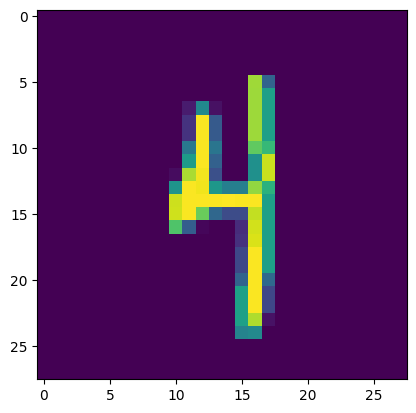

In [12]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=1,validation_split=0.2, verbose=1)

y_prob = model.predict(X_test)

y_pred = y_prob.argmax(axis=1) #gives the index of number whose probability is greatest

print(accuracy_score(y_test,y_pred))

print(y_pred[65])

plt.imshow(X_test[65])